# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
#%load_ext autoreload
#%autoreload 2

# Import your own code
import inauguralproject as ip

# Question 1

**Explain how you solve the model**

Text(0, 0.5, 'Optimal coverage, q*')

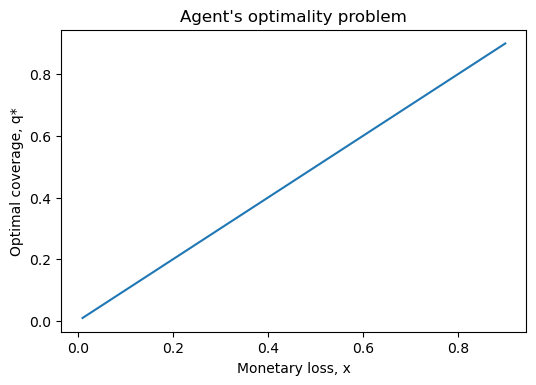

In [2]:
# Agent's assets are initialized, y
y=1

# Create array of possible monetary losses, x
N = 100
x_vec = np.linspace(0.01, 0.9, N)

# Agent's optimality problem
q_guess = [0] 
q_opti = []

for x in x_vec:
    obj_function = lambda q: -ip.expected_utility(q[0], x)
    res = optimize.minimize(obj_function, q_guess, method = 'Nelder-Mead')
    q_opti.append(res.x[0])
    
# Plot
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_vec, q_opti)
plt.title("Agent's optimality problem")
plt.xlabel('Monetary loss, x')
plt.ylabel('Optimal coverage, q*')

# Question 2

Explain your code and procedure

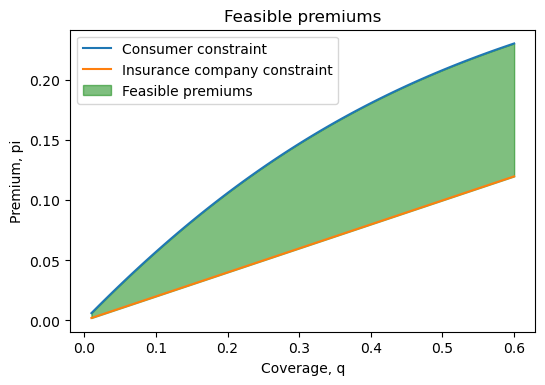

In [3]:
# Constructing a grid of q
q_vec = np.linspace(0.01, 0.6, N)

# Agent's optimality problem
pi_opti = []
pi_guess = [0]

for q in q_vec:
    obj_function_pi = lambda pi: -ip.indifferent(q, pi[0])
    res = optimize.root(obj_function_pi, pi_guess, method='broyden1')
    pi_opti.append(res.x[0])
    
# Plot
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(q_vec, pi_opti)
ax.plot(q_vec, q_vec*0.2)
plt.title("Feasible premiums")
plt.xlabel('Coverage, q')
plt.ylabel('Premium, pi')
plt.fill_between(q_vec, pi_opti, q_vec*0.2, 
                 color='green', alpha=0.5,
                 label='Feasible premiums')
plt.legend(['Consumer constraint', 'Insurance company constraint', 'Feasible premiums'])

# Question 3

Explain your code and procedure

In [7]:
np.random.seed(2000)

insurance_policy1 = ip.expected_utility_MC(gamma=0.9, pi=0.2)
print('V(0.9,0.2) =', insurance_policy1)

insurance_policy2 = ip.expected_utility_MC(gamma=0.45, pi=0.1)
print('V(0.45,0.1) =', insurance_policy2)

V(0.9,0.2) = -1.2860674143159545
V(0.45,0.1) = -1.297986452008331


ADD CONCISE CONLUSION.